In [36]:
import pandas as pd
from glob import glob
from os import path
from collections import defaultdict
import matplotlib.pyplot as plt
plt.style.use('notebook')
import matplotlib.patches as mpatches

%matplotlib notebook

from IPython.display import display, Markdown, Latex

def print_md(string):
    display(Markdown(string))

def print_ltx(string):
    display(Latex(string))



## Definition of paths and global variables

In [5]:
data_dir = '../data/turbines/'
metocean_data = '../data/environment/'
results_dir = '../results/data_availability'
results_delta_t_dir = path.join(results_dir, 'delta-t')

available_data = defaultdict(dict)
sbi_times = dict()
wind_times = list()
wave_times = list()

## tom data availability

In [24]:
for turbine in sorted(glob(path.join(data_dir, 'turbine-??'))):
    turbine_name=turbine.split('/')[-1]
    
    sbi_file = path.join(turbine, f'{turbine_name}_sbi-installation-times.csv')
    if path.isfile(sbi_file):
        print(f'found sbi file: {sbi_file}')
        sbi_times[turbine_name] = pd.read_csv(sbi_file)
        sbi_times[turbine_name].sbi_times = pd.to_datetime(sbi_times[turbine_name].sbi_times, unit='s', utc=True)
    
    for pos in ('helihoist-1', 'sbitroot', 'sbittip', 'tp'):
        turbine_pos = path.join(turbine, pos)
        if path.isdir(turbine_pos):
            data_availability_file = path.join(turbine_pos, path.join('tom', f'{turbine_name}_{pos}_tom_acc-vel-pos_data-availability.csv'))
            if path.isfile(data_availability_file):
                print(f'found data availability file {data_availability_file}')
                available_data[turbine_name][pos] = pd.read_csv(data_availability_file)
                available_data[turbine_name][pos].start = pd.to_datetime(available_data[turbine_name][pos].start, 
                                                                         format='%Y-%m-%d-%H-%M-%S', 
                                                                         utc=True,
                                                                        )
                available_data[turbine_name][pos].stop = pd.to_datetime(available_data[turbine_name][pos].stop,
                                                                        format='%Y-%m-%d-%H-%M-%S',
                                                                        utc=True,
                                                                       )
                
                
                available_data[turbine_name][pos].insert(loc=2, 
                                                         column='delta_t',
                                                         # test.start.shift(-1).dropna().astype('int64')/1e9 - test.stop.astype('int64')/1e9
                                                         value=((available_data[turbine_name][pos].start.shift(-1).dropna().astype('int64')/1e9) - (available_data[turbine_name][pos].stop.astype('int64')/1e9)))

found data availability file ../data/turbines/turbine-01/helihoist-1/tom/turbine-01_helihoist-1_tom_acc-vel-pos_data-availability.csv
found data availability file ../data/turbines/turbine-02/helihoist-1/tom/turbine-02_helihoist-1_tom_acc-vel-pos_data-availability.csv
found data availability file ../data/turbines/turbine-02/sbitroot/tom/turbine-02_sbitroot_tom_acc-vel-pos_data-availability.csv
found data availability file ../data/turbines/turbine-02/tp/tom/turbine-02_tp_tom_acc-vel-pos_data-availability.csv
found sbi file: ../data/turbines/turbine-03/turbine-03_sbi-installation-times.csv
found data availability file ../data/turbines/turbine-03/helihoist-1/tom/turbine-03_helihoist-1_tom_acc-vel-pos_data-availability.csv
found data availability file ../data/turbines/turbine-03/sbitroot/tom/turbine-03_sbitroot_tom_acc-vel-pos_data-availability.csv
found data availability file ../data/turbines/turbine-03/sbittip/tom/turbine-03_sbittip_tom_acc-vel-pos_data-availability.csv
found data availab

## Metocean data availability

In [32]:
for lidar_file in glob(path.join(metocean_data, 'wind/lidar/*.csv')):
    wind_times.append(pd.to_datetime(lidar_file.split('/')[-1].split('_')[-1].split('.')[0], format='%Y-%m-%d', utc=True))

for wave_file in glob(path.join(metocean_data, 'waves/wmb-sued/*.csv')):
    wave_times.append(pd.to_datetime(wave_file.split('/')[-1].split('_')[-1].split('.')[0], format='%Y-%m-%d', utc=True))

## $\Delta T$ between files

<IPython.core.display.Javascript object>


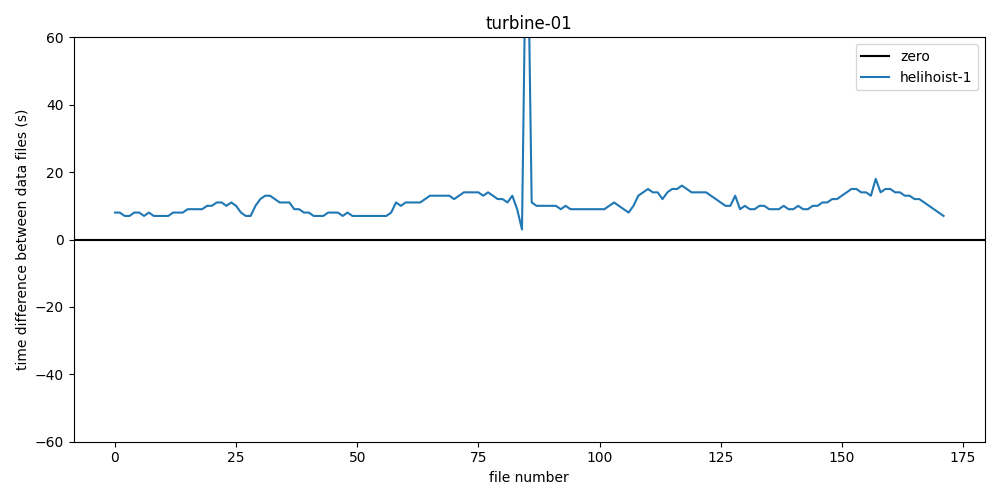

<IPython.core.display.Javascript object>


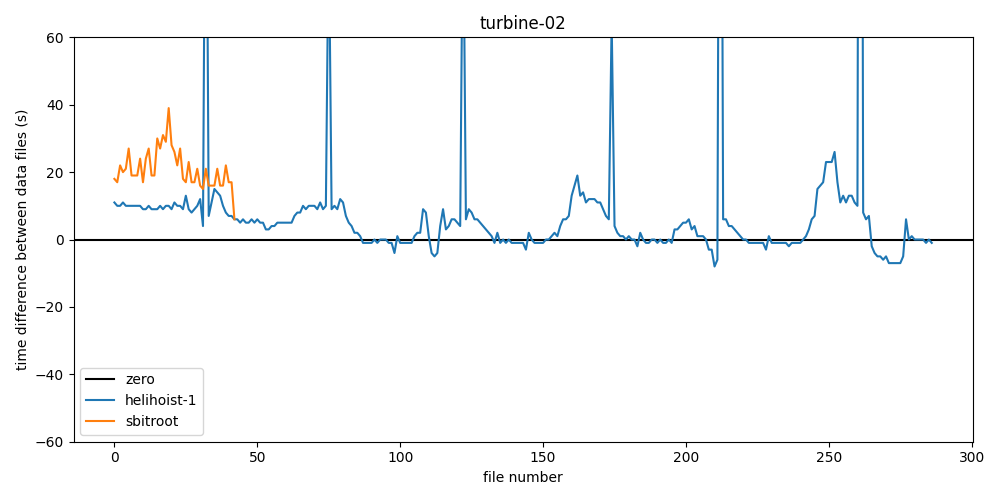

|     | start                     | stop                      |   delta_t | filepath                                                                                                                  |
|----:|:--------------------------|:--------------------------|----------:|:--------------------------------------------------------------------------------------------------------------------------|
|  87 | 2019-08-19 19:25:55+00:00 | 2019-08-19 19:58:02+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-19-19-25-55_2019-08-19-19-58-02.csv |
|  88 | 2019-08-19 19:58:01+00:00 | 2019-08-19 20:30:06+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-19-19-58-01_2019-08-19-20-30-06.csv |
|  89 | 2019-08-19 20:30:05+00:00 | 2019-08-19 21:02:12+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-19-20-30-05_2019-08-19-21-02-12.csv |
|  90 | 2019-08-19 21:02:11+00:00 | 2019-08-19 21:34:21+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-19-21-02-11_2019-08-19-21-34-21.csv |
|  92 | 2019-08-19 22:06:30+00:00 | 2019-08-19 22:38:41+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-19-22-06-30_2019-08-19-22-38-41.csv |
|  96 | 2019-08-20 00:15:11+00:00 | 2019-08-20 00:47:21+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-00-15-11_2019-08-20-00-47-21.csv |
|  97 | 2019-08-20 00:47:20+00:00 | 2019-08-20 01:19:31+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-00-47-20_2019-08-20-01-19-31.csv |
|  98 | 2019-08-20 01:19:30+00:00 | 2019-08-20 01:51:41+00:00 |        -4 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-01-19-30_2019-08-20-01-51-41.csv |
| 100 | 2019-08-20 02:23:49+00:00 | 2019-08-20 02:55:58+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-02-23-49_2019-08-20-02-55-58.csv |
| 101 | 2019-08-20 02:55:57+00:00 | 2019-08-20 03:28:08+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-02-55-57_2019-08-20-03-28-08.csv |
| 102 | 2019-08-20 03:28:07+00:00 | 2019-08-20 04:00:18+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-03-28-07_2019-08-20-04-00-18.csv |
| 103 | 2019-08-20 04:00:17+00:00 | 2019-08-20 04:32:28+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-04-00-17_2019-08-20-04-32-28.csv |
| 104 | 2019-08-20 04:32:27+00:00 | 2019-08-20 05:04:38+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-04-32-27_2019-08-20-05-04-38.csv |
| 111 | 2019-08-20 07:30:10+00:00 | 2019-08-20 08:03:17+00:00 |        -4 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-07-30-10_2019-08-20-08-03-17.csv |
| 112 | 2019-08-20 08:03:13+00:00 | 2019-08-20 08:36:19+00:00 |        -5 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-08-03-13_2019-08-20-08-36-19.csv |
| 113 | 2019-08-20 08:36:14+00:00 | 2019-08-20 09:09:21+00:00 |        -4 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-08-36-14_2019-08-20-09-09-21.csv |
| 133 | 2019-08-20 18:52:59+00:00 | 2019-08-20 19:25:19+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-18-52-59_2019-08-20-19-25-19.csv |
| 135 | 2019-08-20 19:57:34+00:00 | 2019-08-20 20:29:53+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-19-57-34_2019-08-20-20-29-53.csv |
| 137 | 2019-08-20 21:02:10+00:00 | 2019-08-20 21:34:33+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-21-02-10_2019-08-20-21-34-33.csv |
| 139 | 2019-08-20 22:07:00+00:00 | 2019-08-20 22:39:24+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-22-07-00_2019-08-20-22-39-24.csv |
| 140 | 2019-08-20 22:39:23+00:00 | 2019-08-20 23:11:47+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-22-39-23_2019-08-20-23-11-47.csv |
| 141 | 2019-08-20 23:11:46+00:00 | 2019-08-20 23:44:09+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-23-11-46_2019-08-20-23-44-09.csv |
| 142 | 2019-08-20 23:44:08+00:00 | 2019-08-21 00:16:33+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-20-23-44-08_2019-08-21-00-16-33.csv |
| 143 | 2019-08-21 00:16:32+00:00 | 2019-08-21 00:48:57+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-00-16-32_2019-08-21-00-48-57.csv |
| 144 | 2019-08-21 00:48:56+00:00 | 2019-08-21 01:21:20+00:00 |        -3 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-00-48-56_2019-08-21-01-21-20.csv |
| 147 | 2019-08-21 02:26:04+00:00 | 2019-08-21 02:58:27+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-02-26-04_2019-08-21-02-58-27.csv |
| 148 | 2019-08-21 02:58:26+00:00 | 2019-08-21 03:30:46+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-02-58-26_2019-08-21-03-30-46.csv |
| 149 | 2019-08-21 03:30:45+00:00 | 2019-08-21 04:03:08+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-03-30-45_2019-08-21-04-03-08.csv |
| 150 | 2019-08-21 04:03:07+00:00 | 2019-08-21 04:35:29+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-04-03-07_2019-08-21-04-35-29.csv |
| 183 | 2019-08-21 21:56:44+00:00 | 2019-08-21 22:29:06+00:00 |        -2 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-21-56-44_2019-08-21-22-29-06.csv |
| 186 | 2019-08-21 23:33:49+00:00 | 2019-08-22 00:06:09+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-21-23-33-49_2019-08-22-00-06-09.csv |
| 187 | 2019-08-22 00:06:08+00:00 | 2019-08-22 00:38:30+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-00-06-08_2019-08-22-00-38-30.csv |
| 190 | 2019-08-22 01:43:18+00:00 | 2019-08-22 02:15:44+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-01-43-18_2019-08-22-02-15-44.csv |
| 192 | 2019-08-22 02:48:08+00:00 | 2019-08-22 03:20:33+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-02-48-08_2019-08-22-03-20-33.csv |
| 193 | 2019-08-22 03:20:32+00:00 | 2019-08-22 03:52:57+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-03-20-32_2019-08-22-03-52-57.csv |
| 195 | 2019-08-22 04:25:19+00:00 | 2019-08-22 04:57:42+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-04-25-19_2019-08-22-04-57-42.csv |
| 208 | 2019-08-22 11:33:08+00:00 | 2019-08-22 12:06:03+00:00 |        -3 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-11-33-08_2019-08-22-12-06-03.csv |
| 209 | 2019-08-22 12:06:00+00:00 | 2019-08-22 12:38:35+00:00 |        -3 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-12-06-00_2019-08-22-12-38-35.csv |
| 210 | 2019-08-22 12:38:32+00:00 | 2019-08-22 13:11:09+00:00 |        -8 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-12-38-32_2019-08-22-13-11-09.csv |
| 211 | 2019-08-22 13:11:01+00:00 | 2019-08-22 13:43:39+00:00 |        -6 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-13-11-01_2019-08-22-13-43-39.csv |
| 222 | 2019-08-22 19:02:14+00:00 | 2019-08-22 19:34:42+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-19-02-14_2019-08-22-19-34-42.csv |
| 223 | 2019-08-22 19:34:41+00:00 | 2019-08-22 20:07:09+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-19-34-41_2019-08-22-20-07-09.csv |
| 224 | 2019-08-22 20:07:08+00:00 | 2019-08-22 20:39:38+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-20-07-08_2019-08-22-20-39-38.csv |
| 225 | 2019-08-22 20:39:37+00:00 | 2019-08-22 21:12:06+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-20-39-37_2019-08-22-21-12-06.csv |
| 226 | 2019-08-22 21:12:05+00:00 | 2019-08-22 21:44:37+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-21-12-05_2019-08-22-21-44-37.csv |
| 227 | 2019-08-22 21:44:36+00:00 | 2019-08-22 22:17:11+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-21-44-36_2019-08-22-22-17-11.csv |
| 228 | 2019-08-22 22:17:10+00:00 | 2019-08-22 22:49:46+00:00 |        -3 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-22-17-10_2019-08-22-22-49-46.csv |
| 230 | 2019-08-22 23:22:22+00:00 | 2019-08-22 23:54:58+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-23-22-22_2019-08-22-23-54-58.csv |
| 231 | 2019-08-22 23:54:57+00:00 | 2019-08-23 00:27:35+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-22-23-54-57_2019-08-23-00-27-35.csv |
| 232 | 2019-08-23 00:27:34+00:00 | 2019-08-23 01:00:09+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-00-27-34_2019-08-23-01-00-09.csv |
| 233 | 2019-08-23 01:00:08+00:00 | 2019-08-23 01:32:44+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-01-00-08_2019-08-23-01-32-44.csv |
| 234 | 2019-08-23 01:32:43+00:00 | 2019-08-23 02:05:17+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-01-32-43_2019-08-23-02-05-17.csv |
| 235 | 2019-08-23 02:05:16+00:00 | 2019-08-23 02:37:53+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-02-05-16_2019-08-23-02-37-53.csv |
| 236 | 2019-08-23 02:37:52+00:00 | 2019-08-23 03:10:27+00:00 |        -2 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-02-37-52_2019-08-23-03-10-27.csv |
| 237 | 2019-08-23 03:10:25+00:00 | 2019-08-23 03:43:00+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-03-10-25_2019-08-23-03-43-00.csv |
| 238 | 2019-08-23 03:42:59+00:00 | 2019-08-23 04:15:35+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-03-42-59_2019-08-23-04-15-35.csv |
| 239 | 2019-08-23 04:15:34+00:00 | 2019-08-23 04:48:11+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-04-15-34_2019-08-23-04-48-11.csv |
| 240 | 2019-08-23 04:48:10+00:00 | 2019-08-23 05:20:43+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-04-48-10_2019-08-23-05-20-43.csv |
| 265 | 2019-08-23 17:22:26+00:00 | 2019-08-23 17:55:46+00:00 |        -2 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-17-22-26_2019-08-23-17-55-46.csv |
| 266 | 2019-08-23 17:55:44+00:00 | 2019-08-23 18:28:47+00:00 |        -4 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-17-55-44_2019-08-23-18-28-47.csv |
| 267 | 2019-08-23 18:28:43+00:00 | 2019-08-23 19:01:45+00:00 |        -5 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-18-28-43_2019-08-23-19-01-45.csv |
| 268 | 2019-08-23 19:01:40+00:00 | 2019-08-23 19:34:41+00:00 |        -5 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-19-01-40_2019-08-23-19-34-41.csv |
| 269 | 2019-08-23 19:34:36+00:00 | 2019-08-23 20:07:38+00:00 |        -6 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-19-34-36_2019-08-23-20-07-38.csv |
| 270 | 2019-08-23 20:07:32+00:00 | 2019-08-23 20:40:19+00:00 |        -5 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-20-07-32_2019-08-23-20-40-19.csv |
| 271 | 2019-08-23 20:40:14+00:00 | 2019-08-23 21:13:00+00:00 |        -7 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-20-40-14_2019-08-23-21-13-00.csv |
| 272 | 2019-08-23 21:12:53+00:00 | 2019-08-23 21:45:38+00:00 |        -7 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-21-12-53_2019-08-23-21-45-38.csv |
| 273 | 2019-08-23 21:45:31+00:00 | 2019-08-23 22:18:17+00:00 |        -7 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-21-45-31_2019-08-23-22-18-17.csv |
| 274 | 2019-08-23 22:18:10+00:00 | 2019-08-23 22:51:00+00:00 |        -7 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-22-18-10_2019-08-23-22-51-00.csv |
| 275 | 2019-08-23 22:50:53+00:00 | 2019-08-23 23:23:44+00:00 |        -7 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-22-50-53_2019-08-23-23-23-44.csv |
| 276 | 2019-08-23 23:23:37+00:00 | 2019-08-23 23:56:28+00:00 |        -5 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-23-23-23-37_2019-08-23-23-56-28.csv |
| 284 | 2019-08-24 03:36:26+00:00 | 2019-08-24 04:09:18+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-24-03-36-26_2019-08-24-04-09-18.csv |
| 286 | 2019-08-24 04:42:07+00:00 | 2019-08-24 05:14:59+00:00 |        -1 | turbine-02/helihoist-1/tom/acc-vel-pos/turbine-02_helihoist-1_tom_acc-vel-pos_2019-08-24-04-42-07_2019-08-24-05-14-59.csv |

<IPython.core.display.Javascript object>


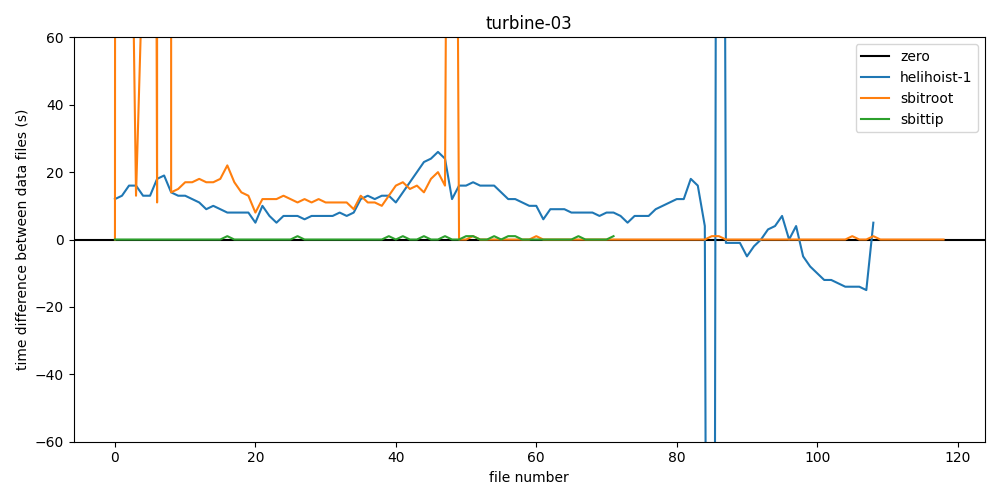

|     | start                     | stop                      |   delta_t | filepath                                                                                                                  |
|----:|:--------------------------|:--------------------------|----------:|:--------------------------------------------------------------------------------------------------------------------------|
|  85 | 2019-08-26 09:45:43+00:00 | 2019-08-26 10:18:47+00:00 |      -602 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-09-45-43_2019-08-26-10-18-47.csv |
|  87 | 2019-08-26 10:51:36+00:00 | 2019-08-26 11:24:30+00:00 |        -1 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-10-51-36_2019-08-26-11-24-30.csv |
|  88 | 2019-08-26 11:24:29+00:00 | 2019-08-26 11:57:21+00:00 |        -1 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-11-24-29_2019-08-26-11-57-21.csv |
|  89 | 2019-08-26 11:57:20+00:00 | 2019-08-26 12:30:12+00:00 |        -1 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-11-57-20_2019-08-26-12-30-12.csv |
|  90 | 2019-08-26 12:30:11+00:00 | 2019-08-26 13:02:37+00:00 |        -5 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-12-30-11_2019-08-26-13-02-37.csv |
|  91 | 2019-08-26 13:02:32+00:00 | 2019-08-26 13:34:59+00:00 |        -2 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-13-02-32_2019-08-26-13-34-59.csv |
|  98 | 2019-08-26 16:30:45+00:00 | 2019-08-26 17:04:00+00:00 |        -5 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-16-30-45_2019-08-26-17-04-00.csv |
|  99 | 2019-08-26 17:03:55+00:00 | 2019-08-26 17:37:00+00:00 |        -8 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-17-03-55_2019-08-26-17-37-00.csv |
| 100 | 2019-08-26 17:36:52+00:00 | 2019-08-26 18:09:56+00:00 |       -10 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-17-36-52_2019-08-26-18-09-56.csv |
| 101 | 2019-08-26 18:09:46+00:00 | 2019-08-26 18:42:52+00:00 |       -12 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-18-09-46_2019-08-26-18-42-52.csv |
| 102 | 2019-08-26 18:42:40+00:00 | 2019-08-26 19:15:46+00:00 |       -12 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-18-42-40_2019-08-26-19-15-46.csv |
| 103 | 2019-08-26 19:15:34+00:00 | 2019-08-26 19:48:34+00:00 |       -13 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-19-15-34_2019-08-26-19-48-34.csv |
| 104 | 2019-08-26 19:48:21+00:00 | 2019-08-26 20:21:26+00:00 |       -14 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-19-48-21_2019-08-26-20-21-26.csv |
| 105 | 2019-08-26 20:21:12+00:00 | 2019-08-26 20:54:15+00:00 |       -14 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-20-21-12_2019-08-26-20-54-15.csv |
| 106 | 2019-08-26 20:54:01+00:00 | 2019-08-26 21:27:04+00:00 |       -14 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-20-54-01_2019-08-26-21-27-04.csv |
| 107 | 2019-08-26 21:26:50+00:00 | 2019-08-26 21:59:54+00:00 |       -15 | turbine-03/helihoist-1/tom/acc-vel-pos/turbine-03_helihoist-1_tom_acc-vel-pos_2019-08-26-21-26-50_2019-08-26-21-59-54.csv |

<IPython.core.display.Javascript object>


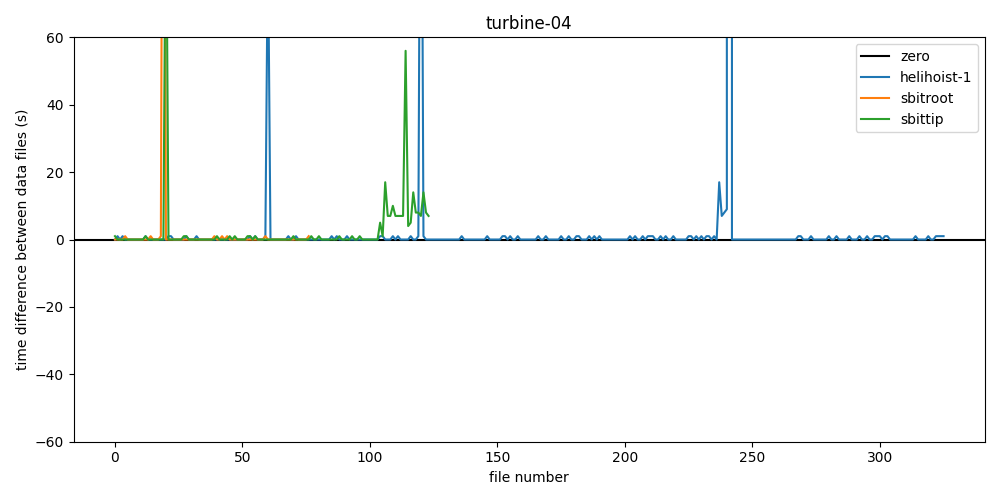

<IPython.core.display.Javascript object>


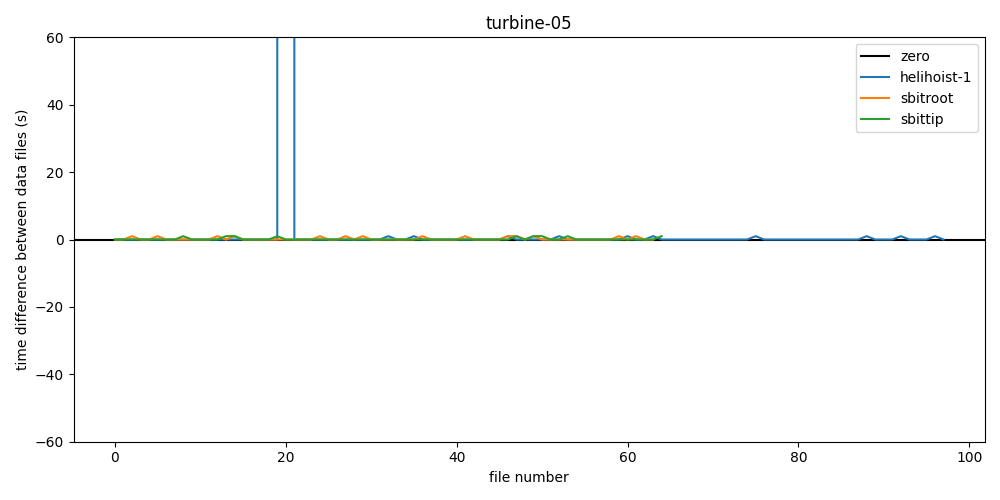

<IPython.core.display.Javascript object>


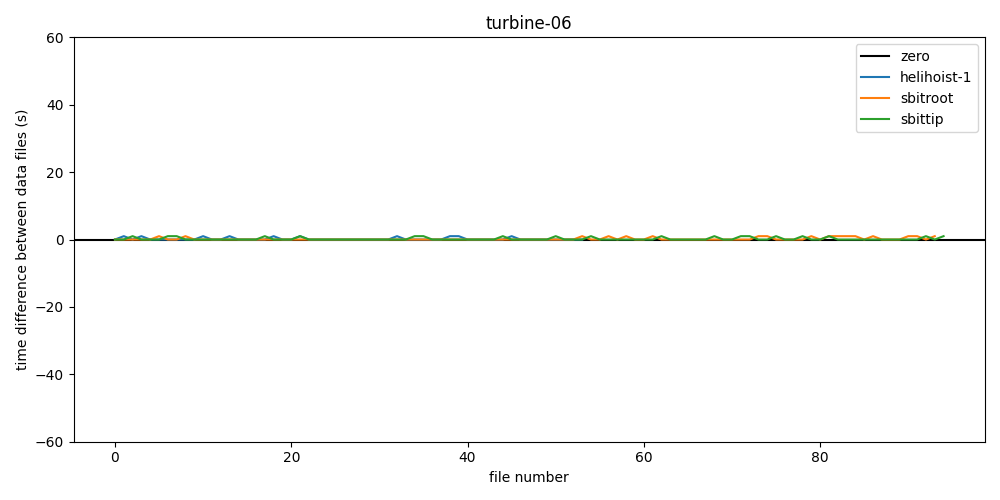

<IPython.core.display.Javascript object>


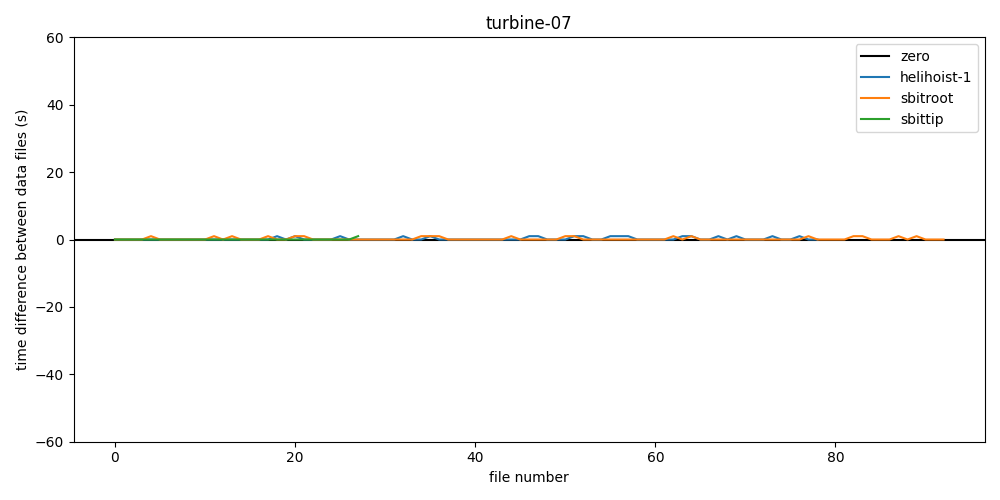

<IPython.core.display.Javascript object>


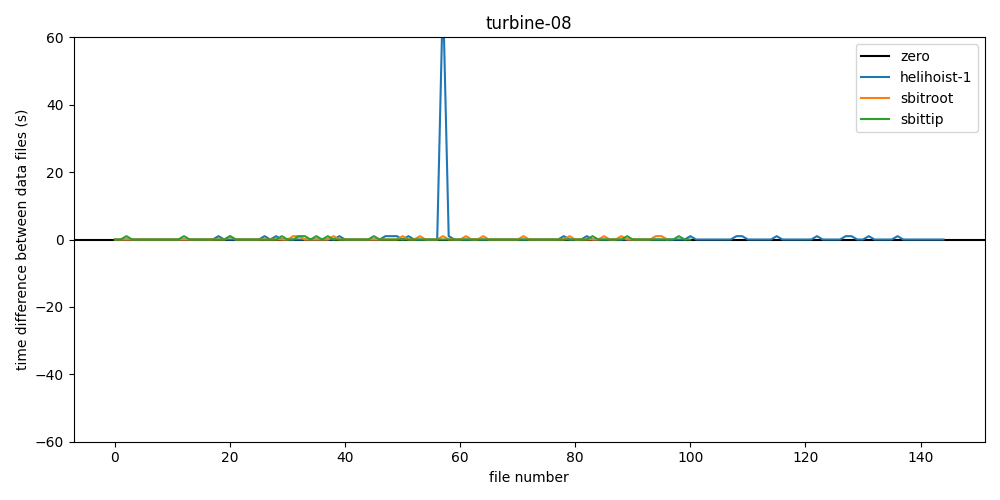

<IPython.core.display.Javascript object>


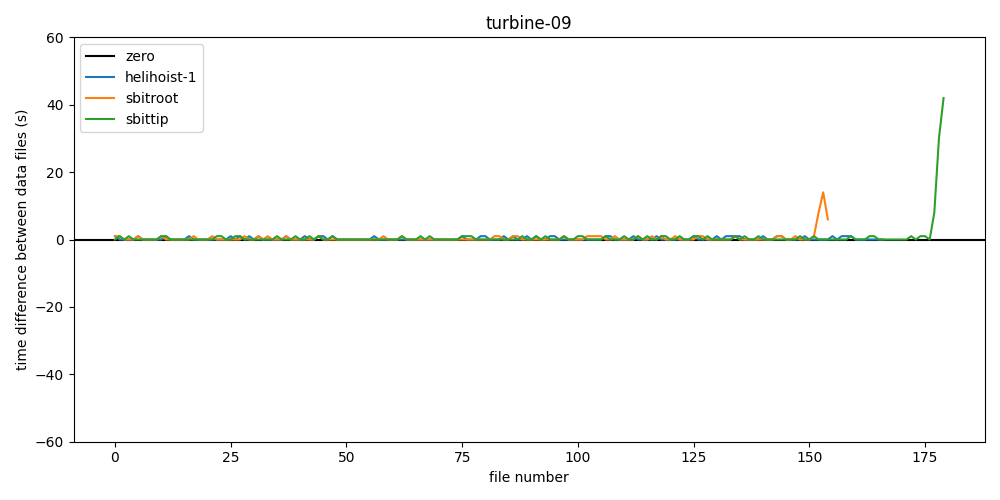

<IPython.core.display.Javascript object>


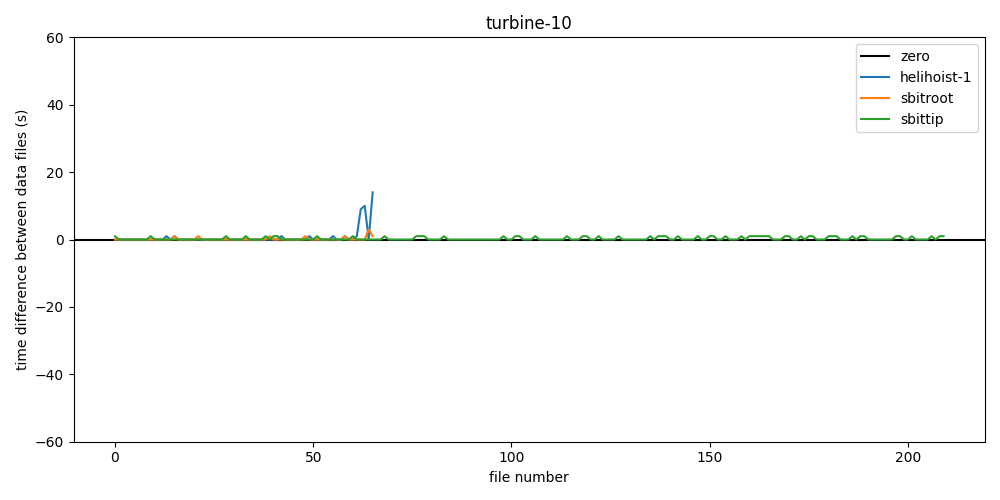

<IPython.core.display.Javascript object>


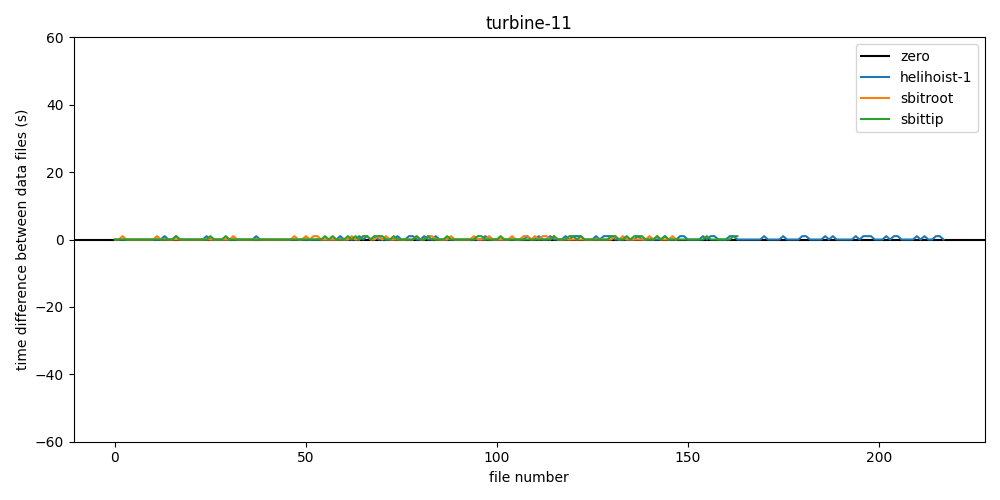

<IPython.core.display.Javascript object>


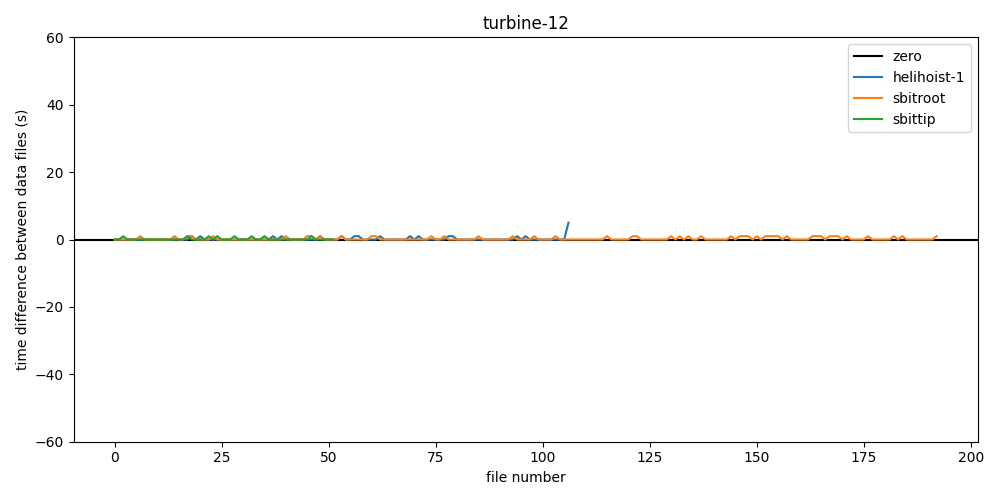

<IPython.core.display.Javascript object>


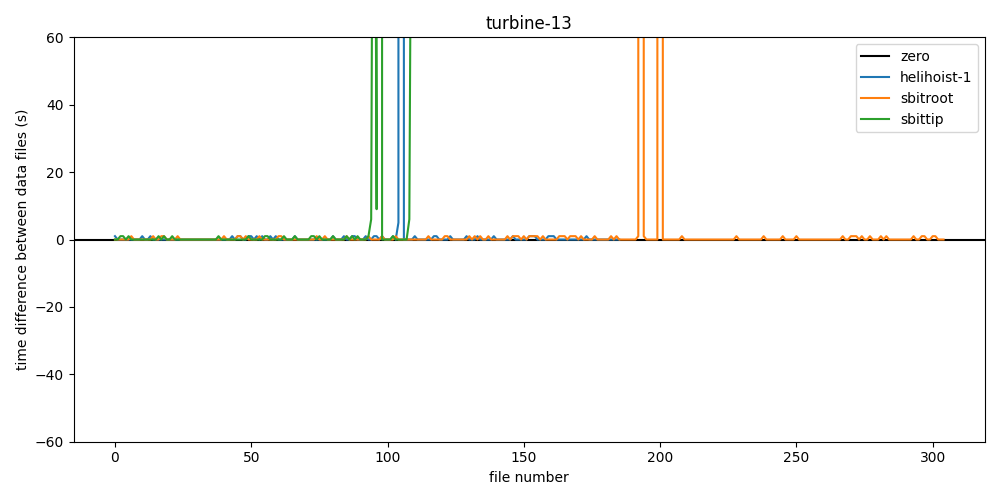

<IPython.core.display.Javascript object>


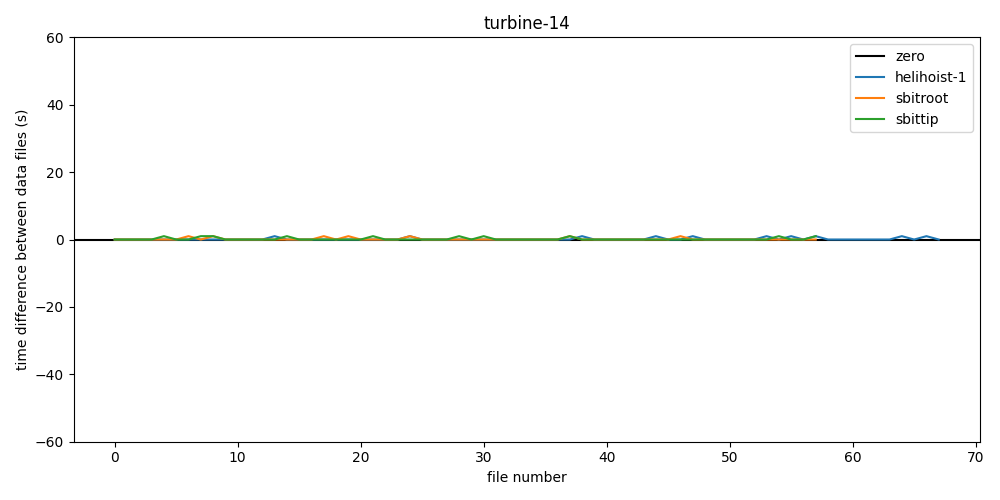

<IPython.core.display.Javascript object>


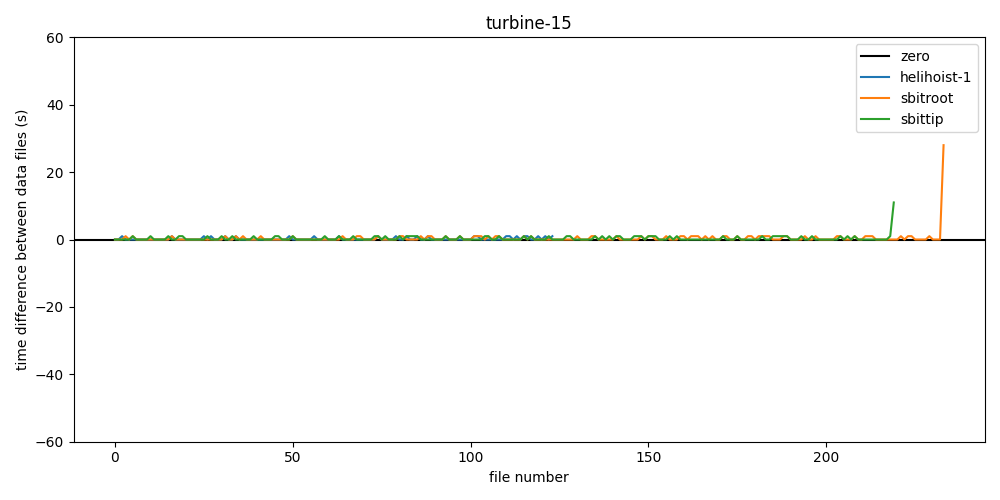

<IPython.core.display.Javascript object>


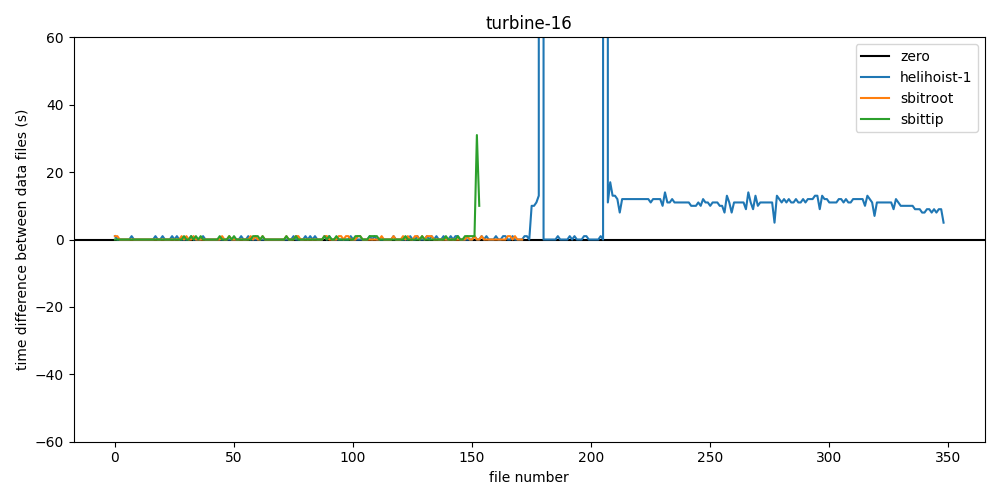

In [26]:
for turbine_name, turbine_data in available_data.items():
    plt.figure(figsize=(10,5))
    plt.title(f'{turbine_name}')
    plt.axhline(y=0, label='zero', color='k')
    for position_name, position_data in turbine_data.items():
        if position_name == 'tp': continue
        plt.plot(position_data.delta_t, label=position_name)
        # print(f'{position_data.filepath[position_data.delta_t < 0].to_markdown()}')
        if not position_data[position_data.delta_t < 0].empty:
            print_md(position_data[position_data.delta_t < 0].to_markdown())
    plt.legend()
    plt.ylim([-60, 60])
    plt.ylabel('time difference between data files (s)')
    plt.xlabel('file number')
    plt.tight_layout()
    try:
        plt.savefig(path.join(results_delta_t_dir, f'{turbine_name}_tom_acc-vel-pos_delta-t.png'), dpi=300)
    except Exception as e:
        print(f'failed to export plot: {e}')

## available data overview

<IPython.core.display.Javascript object>


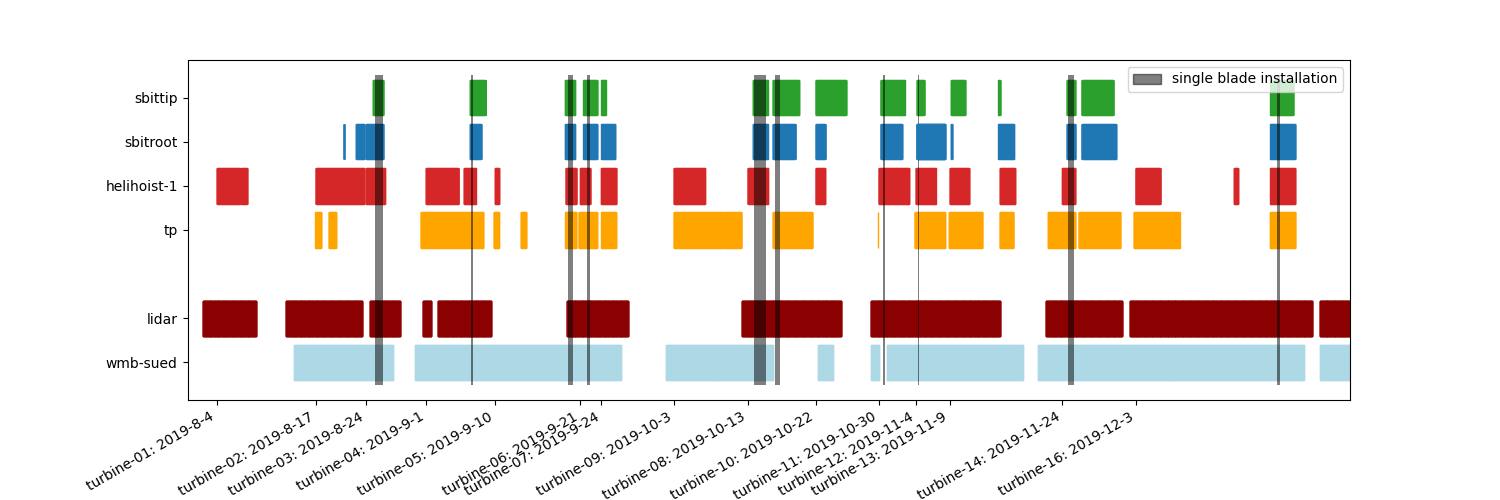

In [35]:
plt.figure(figsize=(15,5))
namelist = list()
colors = {'waves'       : 'lightblue',
          'wind'        : 'darkred',
          'helihoist-1' : 'tab:red',
          'sbitroot'    : 'tab:blue',
          'sbittip'     : 'tab:green',
          'tp'          : 'orange',
         }
position = {'waves'       : 1,
            'wind'        : 2,
            'tp'          : 4,
            'helihoist-1' : 5,
            'sbitroot'    : 6,
            'sbittip'     : 7,
           }

for day in wave_times:
    plt.broken_barh([(day, pd.to_timedelta(24, unit='h')),],
                    (position['waves']+0.1, 0.8),
                    color=colors['waves'],
                   )

for day in wind_times:
    plt.broken_barh([(day, pd.to_timedelta(24, unit='h')),],
                    (position['wind']+0.1, 0.8),
                    color=colors['wind'],
                   )    
    
for i, (turbine_name, turbine_data) in enumerate(available_data.items()):
    
    for j, (position_name, position_data) in enumerate(turbine_data.items()):
        plt.broken_barh([(position_data.start.iloc[i], (position_data.stop.iloc[i] - position_data.start.iloc[i])) for i in range(len(position_data.start))], 
                        (position[position_name] + 0.1, 0.8),
                        color=colors[position_name]
                       )
    
    if not turbine_name in sbi_times:
        continue
        
    plt.broken_barh([(sbi_times[turbine_name].sbi_times.iloc[i], sbi_times[turbine_name].sbi_times.iloc[i+1] - sbi_times[turbine_name].sbi_times.iloc[i]) for i in range(len(sbi_times[turbine_name])-1)],
                    (1, 7),
                    facecolor='k',
                    alpha=0.5,
                    #edgecolor='k',
                    # hatch='//'
                   )

   
sbi_patch = mpatches.Patch(color='k', alpha=0.5, label='single blade installation')
plt.legend(handles=[sbi_patch])
plt.yticks([1.5, 2.5, 4.5, 5.5, 6.5, 7.5], ['wmb-sued', 'lidar', 'tp', 'helihoist-1', 'sbitroot', 'sbittip'])
plt.xticks([t['helihoist-1'].start.iloc[0] for _, t in available_data.items()], [f'{n}: {t["helihoist-1"].start[0].year}-{t["helihoist-1"].start[0].month}-{t["helihoist-1"].start[0].day}' for n, t in available_data.items()])
plt.gcf().autofmt_xdate()
plt.xlim([pd.to_datetime('2019-08-01'), pd.to_datetime('2020-01-01')])
plt.savefig(path.join(results_dir, 'available-data.png'), dpi=150)